# Intro to Bootstrap

In [1]:
from prereqs import *

now importing: 
1. numpy as np 
2. matplotlib.pyplot as plt
3. from scipy stats




## Bootstrap 

Bootstrap methods are a class of Monte Carlo methods known as nonparametric Monte Carlo. Bootstrap methods in simple terms are methods of *resampling* observed data to estimate the CDF from which the observed data is supposed to have originate from. 

Suppose we observe *independent* samples $x_1, ..., x_n$ from pdf/pmf $f$, and whose CDF $F$ is unobservable. Well, given that $X = (x_1, ..., x_n)^T$ originates from $F$, we can use $X$ to generate the empirical CDF $F_n$ which is itself an estimate of $F$. 

$$
F_n \to F \text{ as } n \to \infty
$$

If we sample (with replacement) another set of $n$ observations from $F_n$, we will have $X^* = (x_1^*, ..., x_n^*)^T$. This new sample $X^*$ can then generate another empirical CDF, $F^*_n$ which is another estimate of $F$. 

That is, $F^*_n$ is a bootstrap estimator of $F$. We can continue this process of resampling with replacement to obtain samples $X^*_1,X^*_2, ..., X^*_B$ and $F^*_{n,1}, F^*_{n,2}, ..., F^*_{n,B}$.



## Bootstrap 

In addition to estimating the theoretical CDF $F$, there may be a statistic of interest $\theta$ (e.g. mean). We can use bootstrap methods to calculate an empirical distribution of $\theta$. 

From our original sample $X$ we can calculate estimate $\hat{\theta}$. Similarly, using the bootstrap samples we can also  calcualte estimates for $\theta$: $\hat{\theta}^*_1, ..., \hat{\theta}^*_B$.

We can also calculate Bias and make confidence intervals for our estimates.


## Bootstrap Algorithm 

A simple bootstrap algorithm for *independent* samples $X = (x_1, ..., x_n)^T$ is:

To generate *B* bootstrap samples, for *b* in 1, ..., *B* do

1. Sample $x_1, ..., x_n$ with replacement to create sample set $X^*_b$. Each observation $x_i$ has a probability of *1/n* of being in the new sample.

2. For $X^*_b$ calculate $\hat{\theta}^*_b$


## Bootstrap Example 


We will use the `mtcars` data set to illustrate a simple implementation. 

```{r, fig.height=3, fig.width=4}
data("mtcars")
mpg = mtcars$mpg
n = length(mpg)
print(mean(mpg))
hist(x = mpg, probability = TRUE, xlab = "MPG", main = "Histogram of MPG")
```


## Bootstrap Example 

```{r, fig.height=3, fig.width=4}
B = 1000 ## number of bootstraps
results = numeric(B) ## vector to hold results
for(b in 1:B){
  i = sample(x = 1:n, size = n, replace = TRUE) ## sample indices
  bootSample = mpg[i] ## get data
  thetaHat = mean(bootSample) ## calculate the mean for bootstrap sample
  results[b] = thetaHat ## store results
}

hist(x = results, probability = TRUE, 
     main = "Bootstrapped Samples of Mean_mpg",
     xlab = "theta estimates")


```


In [6]:
import pandas as pd
mtcars = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/mtcars.csv", index_col = 0)
mtcars.head()
mpg = mtcars.mpg

In [18]:
n = mtcars.shape[0]
B = 10000 ## number of bootstrap samples
results = [] ## list to hold results
for i in range(B):
    i = np.random.choice(a = range(n), size = n, replace = True)
    tmp = mpg[i]
    thetaHat = np.mean(tmp)
    results.append(thetaHat)

    

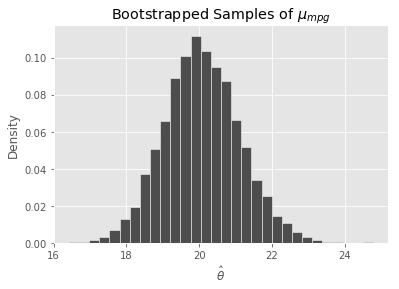

In [19]:
## histogram default to `doane` algorithm for bins, but here i set it to 30 to show more detail
hist(x = np.array(results), 
     title = r"Bootstrapped Samples of $\mu_{mpg}$", 
     xlabel = r"$\hat{\theta}$", bins = 30)






## Bootstrap Example | Precaution 

Before enbarking on resampling methods we must ask what variables are *iid* in order to determine a correct bootstrapping approach. 

Bootstrap methods are *not* a method of generating new data for, say, a regression setting when observed samples are low. 

In the above example, it is assumed that each observation in the `mpg` data set is indpendent and identically distributed from an unknown distribution $f$. 

However, if there were to have existed some autocorrelation structure (as exist in time-series data) then we would need to adjust our resampling methodology to account for this correlation. 

When dealing with time-series data, we will use a method called *block bootsrap*.


## Paired Bootstrapping 

Let's continue to work with the `mtcars` data set. Say we wanted to make inferences about the linear regression parameters.

```{r, message=FALSE}
library(ggplot2, quietly = TRUE) ## for graphics
mtcars$am <- as.factor(mtcars$am) ## Transmission (0 = automatic, 1 = manual
fit = lm(formula = mpg ~ wt + am, data = mtcars)
data.frame(coefficients = coefficients(fit), CI = confint(fit), check.names = FALSE)
```


## Paired Bootstrapping 

```{r, fig.height=4, fig.width=5}
qplot(x = as.factor(am), y = mpg, data = mtcars, geom = "boxplot",
      main = "Boxplot: MPG ~ AM", ylab = "MPG", xlab = "AM",
      colour = am)
```


## Paired Bootstrapping 

```{r, fig.height=4, fig.width=5, message=FALSE}
qplot(x = wt, y = mpg, data = mtcars, geom = c("point", "smooth"),
      main = "Boxplot: MPG ~ Weight", ylab = "MPG", xlab = "Weight",
      method = "lm", formula = y~x)

```



## Paired Bootstrapping 

```{r}

## save coefficients
beta_int = coefficients(fit)[1]
beta_wt = coefficients(fit)[2]
beta_am = coefficients(fit)[3]

n = dim(mtcars)[1] ## number of obs in data
B = 1000 ## number of bootstrap samples

results = matrix(data = NA, nrow = B, ncol = 3, 
                 dimnames = list(NULL, c("Intercept", "wt", "am")))

## begin bootstrap for-loop
for(b in 1:B){
  i = sample(x = 1:n, size = n, replace = TRUE) ## sample indices
  temp = mtcars[i,] ## temp data set
  temp_model =  lm(formula = mpg ~ wt + am, data = temp) ## train model
  coeff = matrix(data = coefficients(temp_model), ncol = 3) ## get coefficients
  results[b,] = coeff ## save coefficients in matrix
}

```



## Paired Bootstrapping 


```{r}

results <- data.frame(results, check.names = FALSE)

summary(results) ## take a look at the samples

boot_int = results[,"Intercept"]
boot_wt = results[,"wt"]
boot_am = results[,"am"]

```


## Paired Bootstrapping 


```{r, echo=FALSE}
par(mfrow = c(2,2))
hist(boot_int, main = "Bootstrapped Coefficients for Intercept",
     xlab = "Coefficients for Intercept", probability = TRUE)
abline(v = coefficients(fit)[1], col = "black", lty=2)


hist(boot_wt, main = "Bootstrapped Coefficients for Weight",
     xlab = "Coefficients for Weight", probability = TRUE)
abline(v = coefficients(fit)[2], col = "blue", lty=2)


hist(boot_am, main = "Bootstrapped Coefficients for AM = 1",
     xlab = "Coefficients for Automatic Transmission", probability = TRUE)
abline(v = coefficients(fit)[3], col = "green", lty=2)



```




## Paired Bootstrapping 


Now we can estimate bias for each parameter estimate. Define Bias as $Bias(\theta) = E[\theta^*] - \theta$, where in our scenario we have $Bias(\hat\theta) = E[\hat\theta^*] - \hat\theta$. Our bootstrap bias corrected estimates are then $\hat\theta_{BC} = \hat\theta - Bias(\hat\theta)$.


```{r}
bias_int = mean(boot_int - beta_int)
print(bias_int)

bias_wt = mean(boot_wt - beta_wt)
print(bias_wt)

bias_am = mean(boot_am - beta_am)
print(bias_am)
```




## Paired Bootstrapping 


```{r}
## incorportate our bias into the coefficients
## we now have bias corrected coefficients

intercept = beta_int - bias_int
print(intercept)

wt = beta_wt - bias_wt
print(wt)

am = beta_am - bias_am
print(am)



```





## Paired Bootstrapping 



Another method for applying the bootstrap approach to building an empirical distribution of $\hat\beta$ is to bootstrap the residuals. However, bootstrapping the cases is often more robust when there are doubts about a constant variance for the residuals, such as heteroskedasticity. Additionally, paired bootstrap more resembles the original data generation mechanisms.






